### The objective of the dataset is to diagnostically predict whether a patient has diabetes,based on certain diagnostic measurements included in the dataset

outcome = Response varible \
In particular, all patients here are females
at least 21 years old

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
sns.set_style("darkgrid")

In [2]:
df= pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Correlation Analysis :
1.“0” means there is no relationship between the variables at all,that states A correlation close to zero suggests no linear association between two continuous variables \
2. While -1 or 1 means that there is a perfect negative or positive correlation.

<Figure size 864x864 with 0 Axes>

<AxesSubplot:>

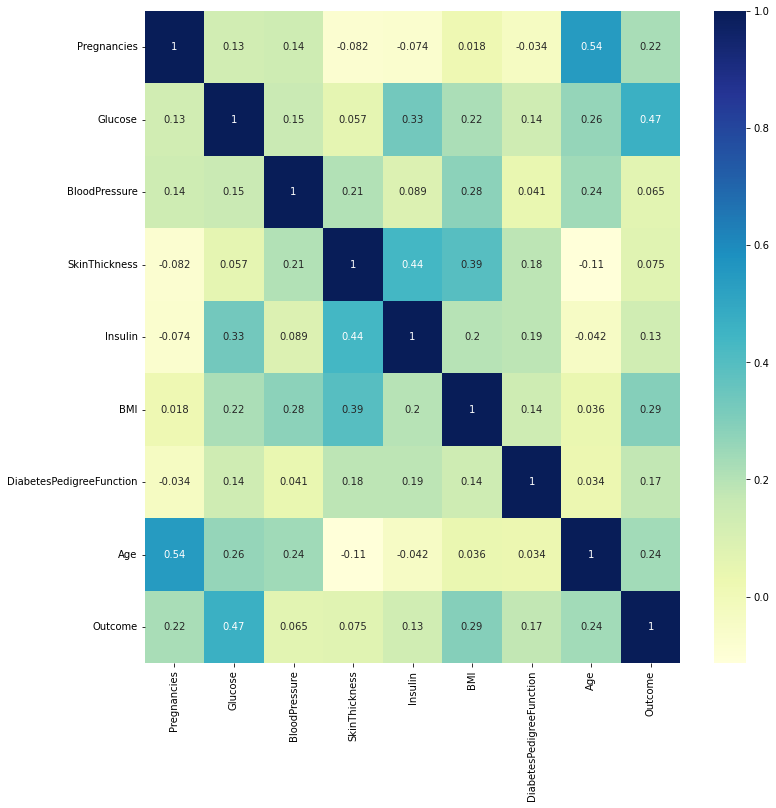

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")

##  Visualization:


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Age v/s BMI')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'BMI')

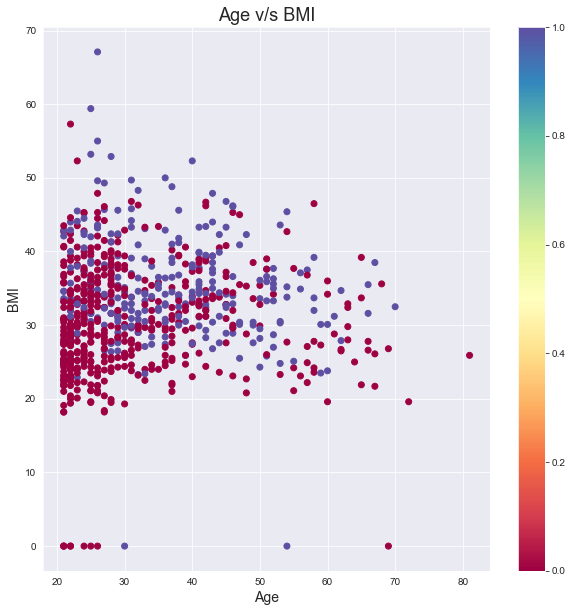

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(x=df.Age,
            y=df.BMI,
            c=df.Outcome.astype('category').cat.codes,cmap='Spectral')
plt.colorbar()
plt.title('Age v/s BMI',fontsize=18)
plt.xlabel("Age",fontsize=14)
plt.ylabel('BMI',fontsize=14)
plt.show()

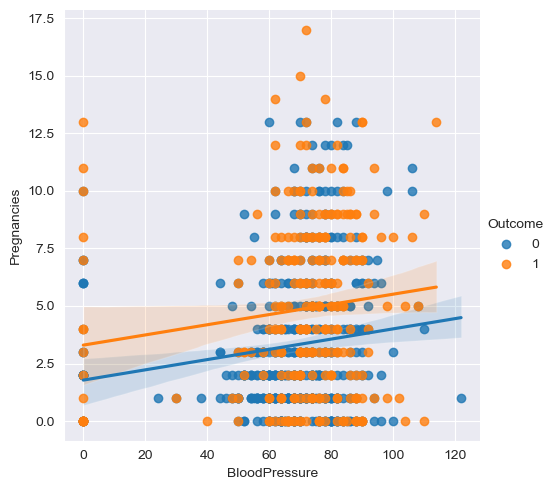

In [37]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='BloodPressure', y='Pregnancies',hue='Outcome', data=df,legend=('Outcome'))

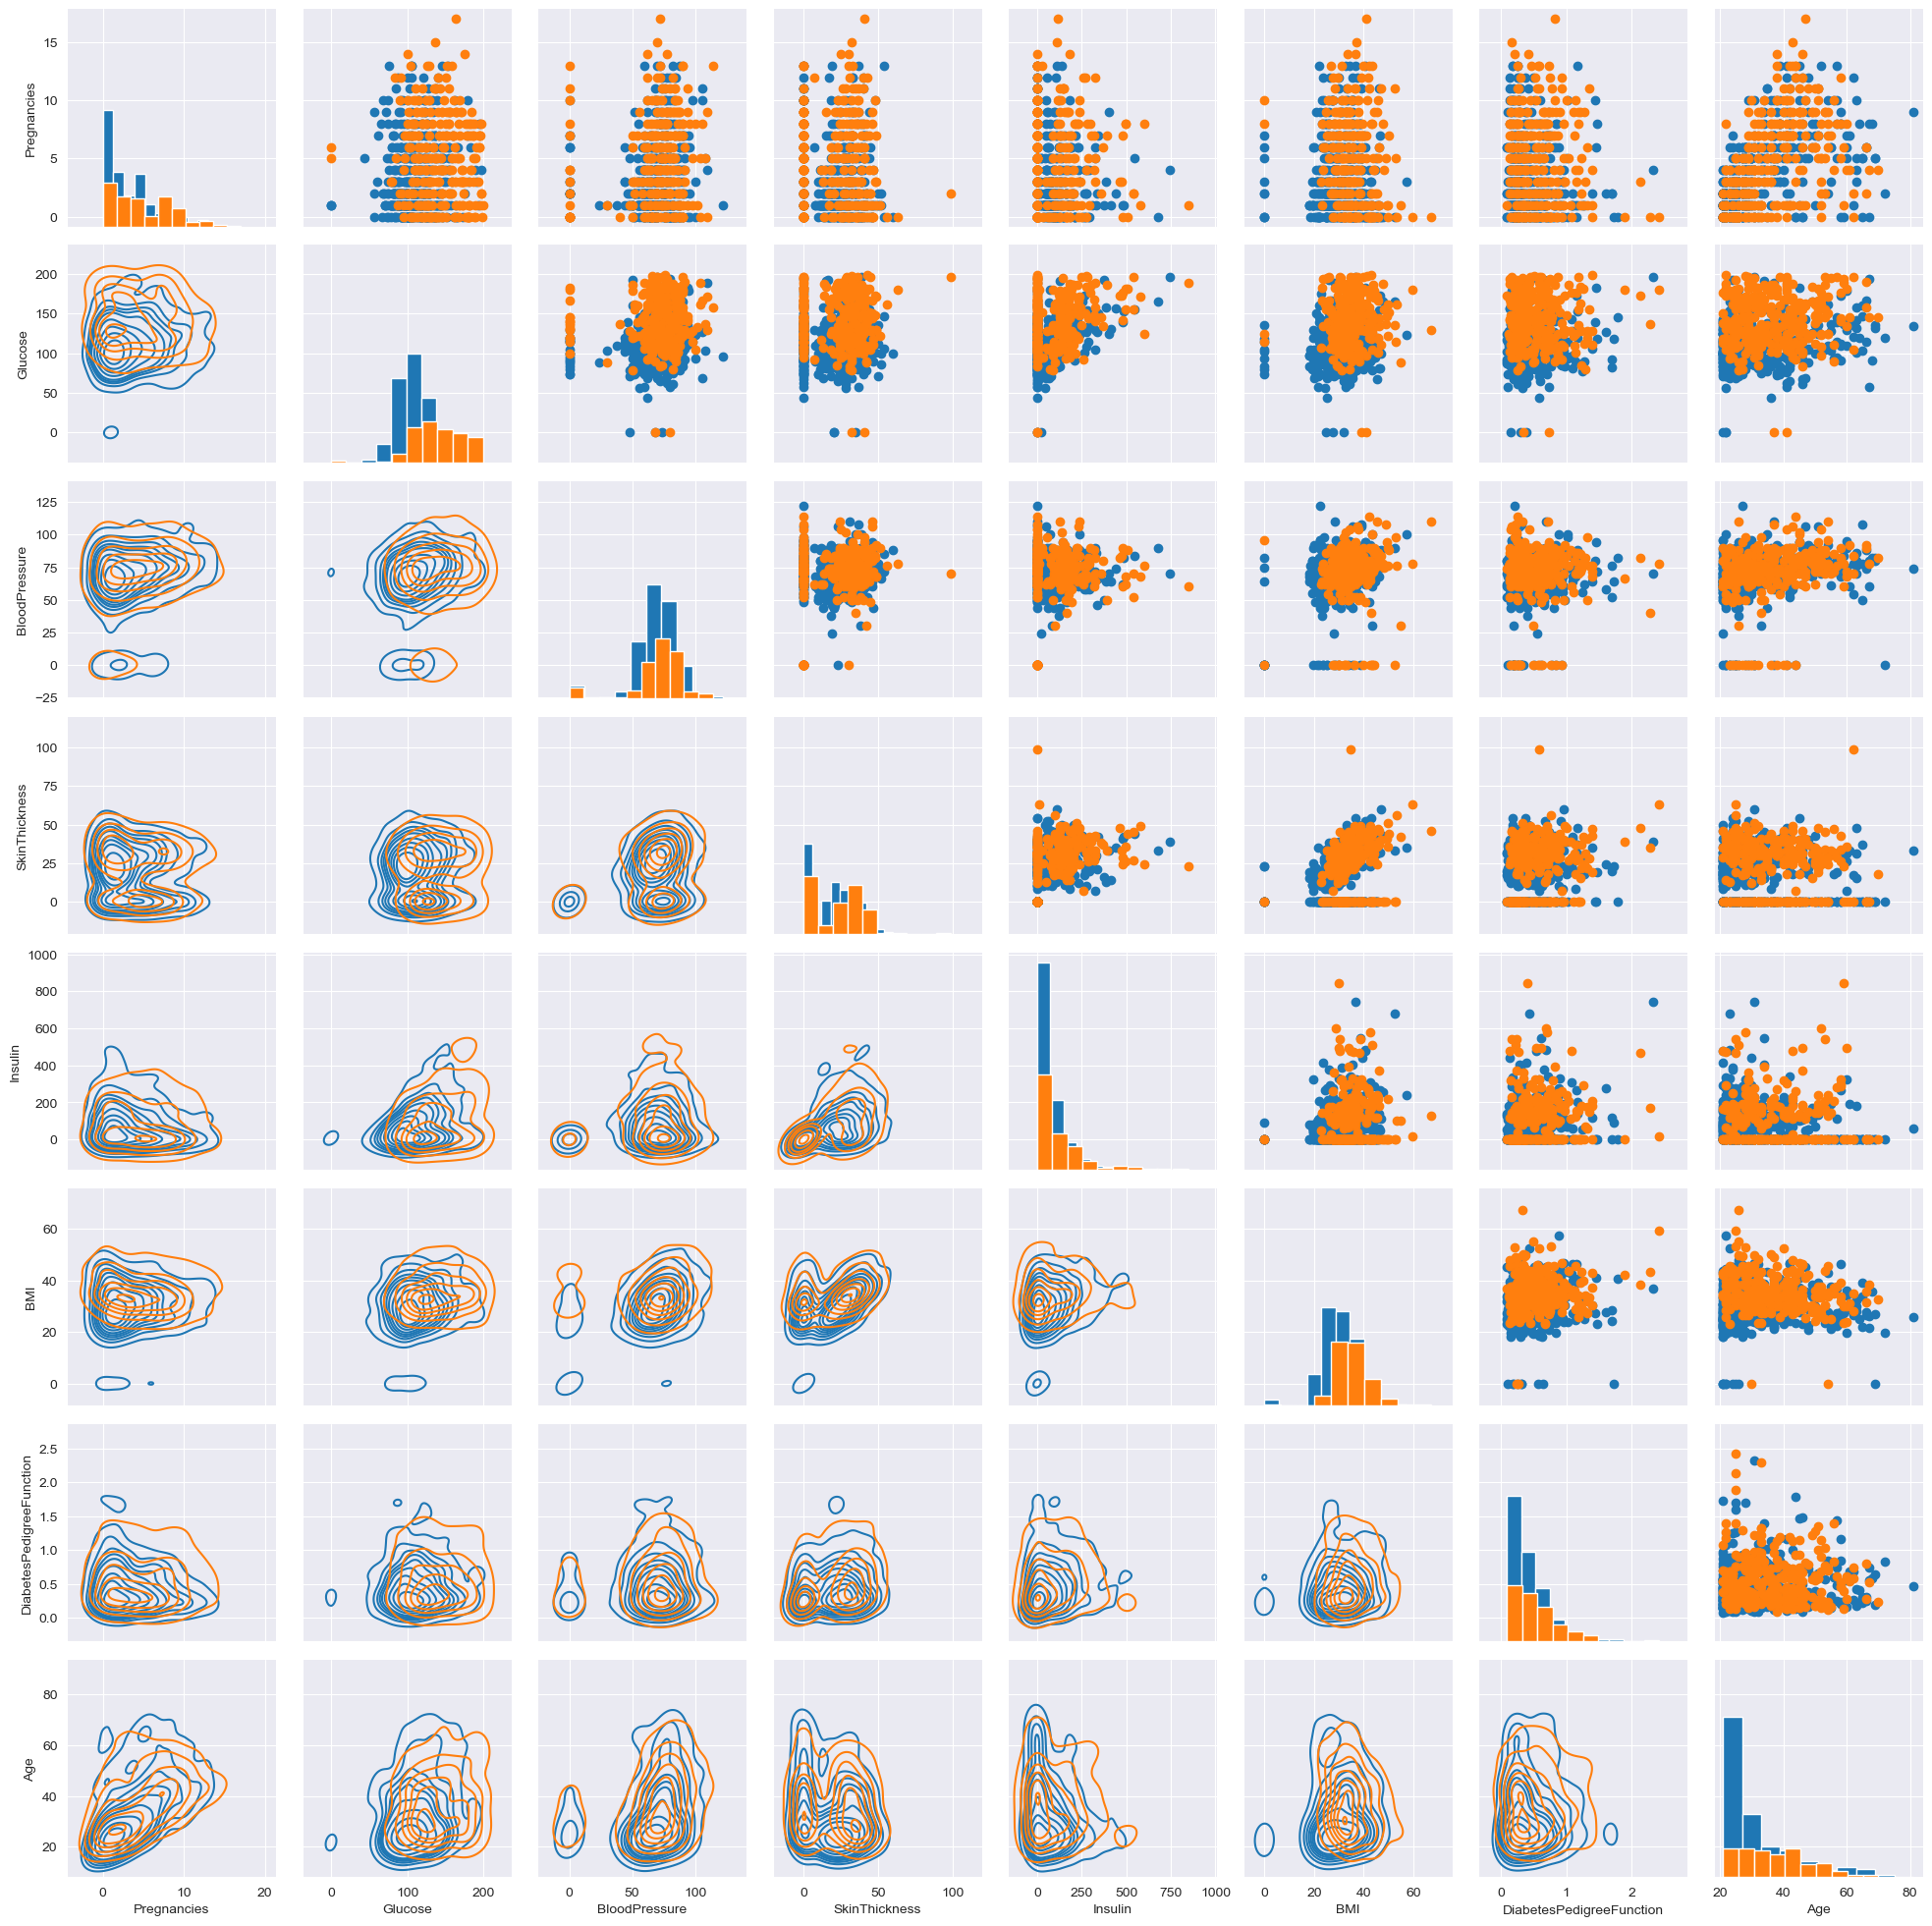

In [39]:
df_Properties=sns.PairGrid(df, hue='Outcome')

df_Properties.map_diag(plt.hist)
df_Properties.map_upper(plt.scatter)
df_Properties.map_lower(sns.kdeplot)

<AxesSubplot:xlabel='Age', ylabel='Count'>

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

<AxesSubplot:xlabel='BMI', ylabel='Count'>

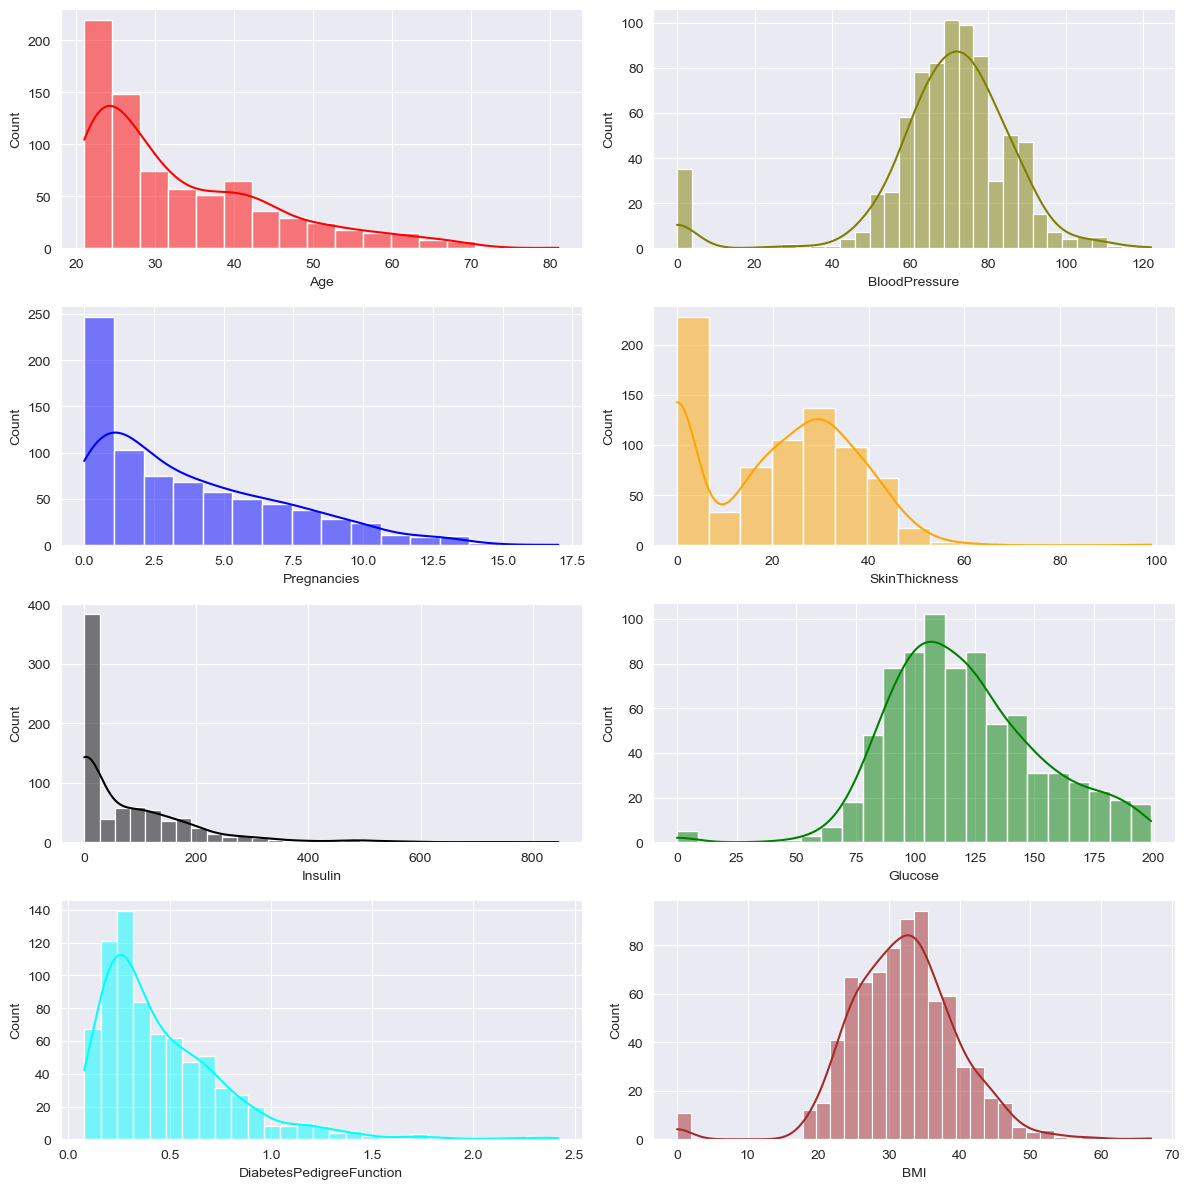

In [41]:
data=df
f, axes = plt.subplots(4, 2, figsize=(12, 12))
sns.histplot(x=data['Age'] , color="red",kde=True, ax=axes[0, 0])
sns.histplot(x=data['BloodPressure'] , color="olive",kde=True, ax=axes[0, 1])
sns.histplot(x=data['Pregnancies'] , color="blue",kde=True, ax=axes[1, 0])
sns.histplot(x=data['SkinThickness'] , color="orange", kde=True,ax=axes[1, 1])
sns.histplot(x=data['Insulin'] , color="black", kde=True, ax=axes[2, 0])
sns.histplot(x=data['Glucose'] , color="green",kde=True, ax=axes[2, 1])
sns.histplot(x=data['DiabetesPedigreeFunction'] , color="cyan",kde=True, ax=axes[3, 0])
sns.histplot(x=data['BMI'] , color="brown",kde=True, ax=axes[3, 1])
plt.tight_layout()

### Split into Train-Test

In [43]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [46]:
from sklearn.model_selection import train_test_split
seed=50
np.random.seed(seed)


In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33)

In [49]:
len(df)
len(x_train)
len(x_test)

768

514

254

In [54]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2', C=1.0,solver='lbfgs')

In [55]:
model = lr.fit(x_train,y_train)


/Users/rakeshbadgujar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0])

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

[[140  27]
 [ 45  42]]


<AxesSubplot:>

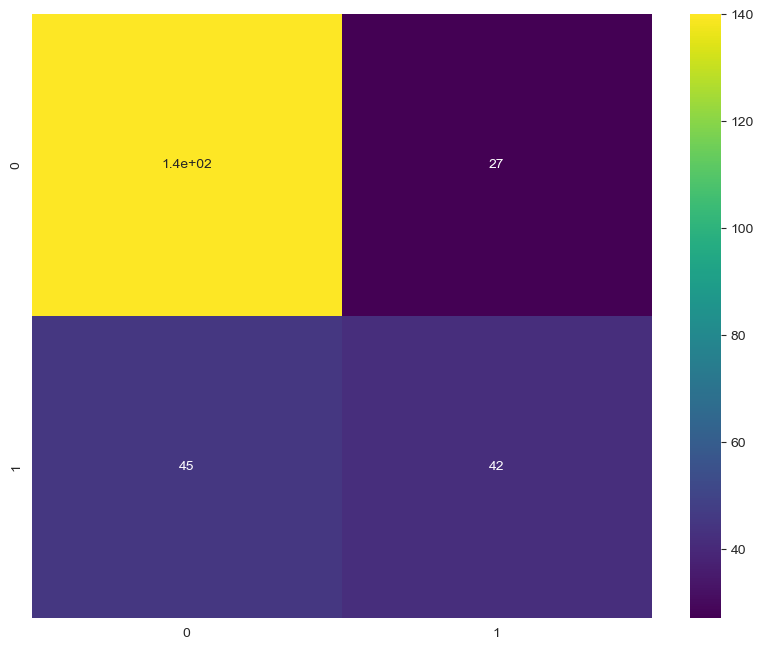

In [59]:
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='viridis')

k-fold Validation method

In [113]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
validation= KFold(10)


In [117]:
cv_scores = cross_val_score(lr,x,y,cv=validation)
print(cv_scores)
np.mean(cv_scores)

/Users/rakeshbadgujar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rakeshbadgujar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[0.7012987  0.83116883 0.76623377 0.68831169 0.77922078 0.74025974
 0.85714286 0.81818182 0.73684211 0.80263158]


/Users/rakeshbadgujar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7721291866028708

<Figure size 600x600 with 0 Axes>

Text(0.5, 1.0, 'Cross validation Results')

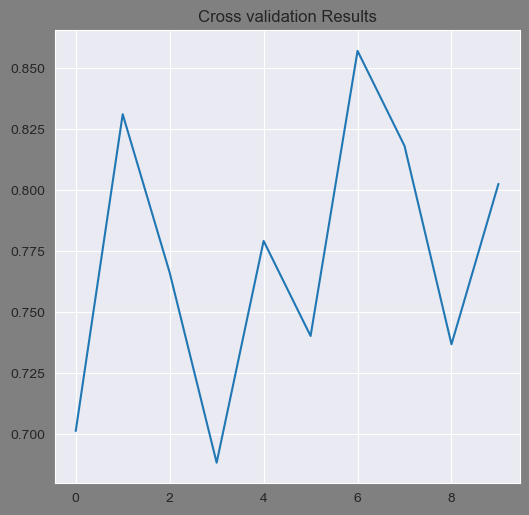

In [121]:
plt.figure(figsize=(6,6),facecolor='gray')
plt.plot(cv_scores)
plt.title("Cross validation Results")

## KNN Classification

In [80]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df.drop('Outcome',axis=1))
x_feature = scale.transform(df.drop('Outcome',axis=1))

StandardScaler()

In [81]:
x_feature

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [84]:
df_x_scaled =pd.DataFrame(x_feature,columns=df.columns[:-1])


In [85]:
df_x_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [86]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [101]:
x_train_scaled,x_test_scaled,y_train,y_test = train_test_split(df_x_scaled,y,test_size=0.33,random_state=50)
len(x_train_scaled)
len(y_test)
len(df)

514

254

768

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
KNN = KNeighborsClassifier(n_neighbors=2,metric='euclidean')

In [98]:
model1 = KNN.fit(x_train_scaled,y_train)

In [99]:
y_pred_knn = KNN.predict(x_test_scaled)

[[148  14]
 [ 69  23]]


<AxesSubplot:>

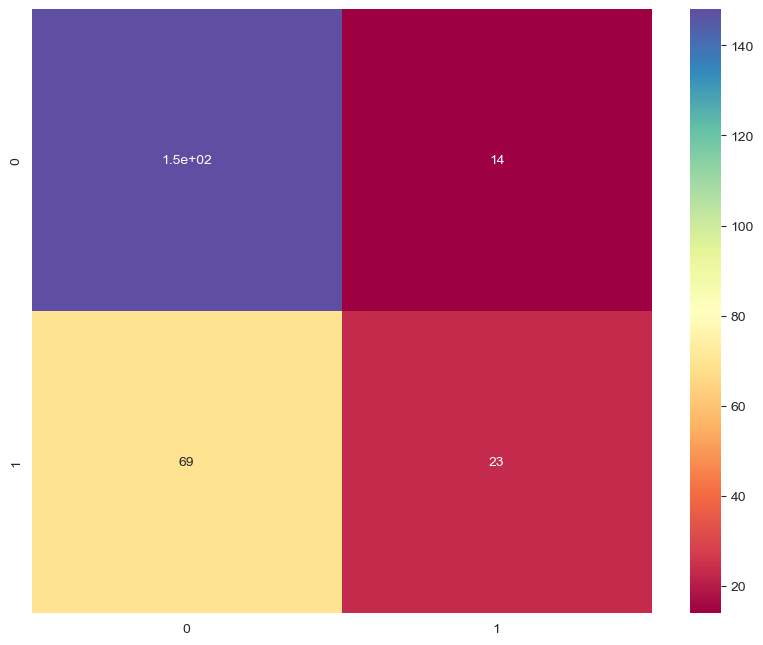

In [102]:
print(confusion_matrix(y_test,y_pred_knn))
sns.heatmap(confusion_matrix(y_test,y_pred_knn),cmap='Spectral',annot=True)

In [103]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78       162
           1       0.62      0.25      0.36        92

    accuracy                           0.67       254
   macro avg       0.65      0.58      0.57       254
weighted avg       0.66      0.67      0.63       254



In [104]:
from sklearn import metrics

In [105]:
score =[]
for k in range(1,20):
    KNN =KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    KNN.fit(x_train_scaled,y_train)
    y_pred=KNN.predict(x_test_scaled)
    score.append(metrics.accuracy_score(y_test,y_pred))
score
    

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

KNeighborsClassifier(metric='euclidean')

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

KNeighborsClassifier(metric='euclidean', n_neighbors=12)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

KNeighborsClassifier(metric='euclidean', n_neighbors=14)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

KNeighborsClassifier(metric='euclidean', n_neighbors=16)

KNeighborsClassifier(metric='euclidean', n_neighbors=17)

KNeighborsClassifier(metric='euclidean', n_neighbors=18)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

[0.65748031496063,
 0.6732283464566929,
 0.7165354330708661,
 0.7086614173228346,
 0.7244094488188977,
 0.7204724409448819,
 0.7283464566929134,
 0.7440944881889764,
 0.7559055118110236,
 0.7480314960629921,
 0.7598425196850394,
 0.7440944881889764,
 0.7322834645669292,
 0.7362204724409449,
 0.7165354330708661,
 0.7401574803149606,
 0.7401574803149606,
 0.7362204724409449,
 0.7440944881889764]

<Figure size 600x600 with 0 Axes>

Text(0.5, 0, 'K Values')

Text(0, 0.5, 'Testing Accuracy')

Text(0.5, 1.0, 'K Determination Using KNN')

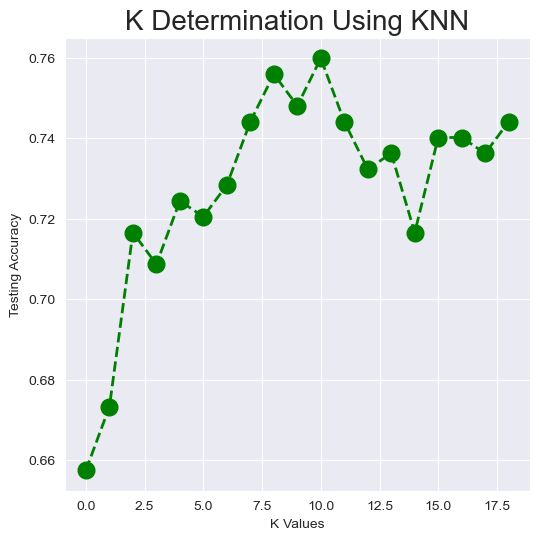

In [110]:
plt.figure(figsize=(6,6))
plt.plot(score,color='green', marker='o',linestyle='dashed',
    linewidth=2, markersize=12)
plt.xlabel('K Values')
plt.ylabel('Testing Accuracy')
plt.title('K Determination Using KNN', fontsize=20)

From this diagram we select the k=5 .

In [124]:
from sklearn.neighbors import KNeighborsClassifier
seed =50
np.random.seed(seed)
KNN_5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [126]:
model_final= KNN_5.fit(x_train_scaled,y_train)

In [127]:
y_final = KNN.predict(x_test_scaled)

In [128]:
print(confusion_matrix(y_test,y_final))

[[147  15]
 [ 50  42]]


<AxesSubplot:>

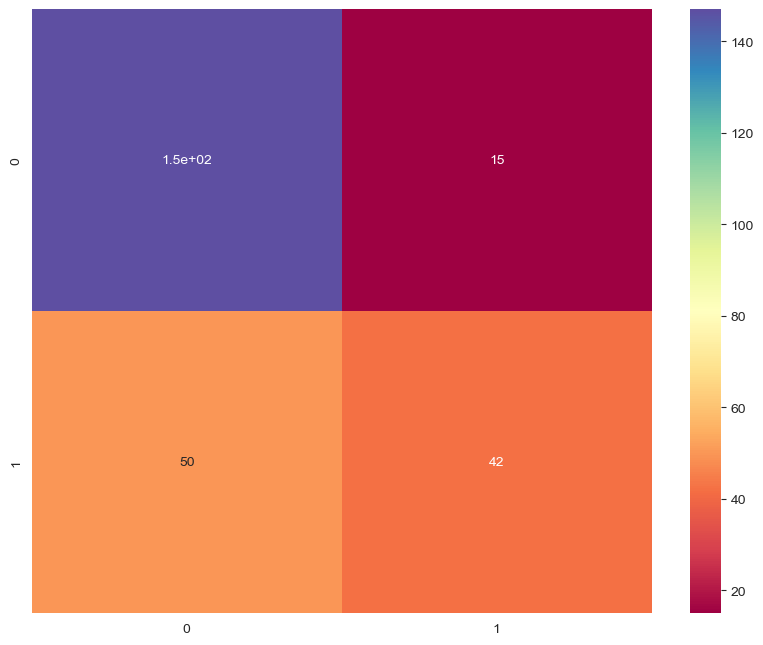

In [130]:
sns.heatmap(confusion_matrix(y_test,y_final),cmap='Spectral',annot=True)